# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [2]:
# Display shape of the training and test sets

print(f'Training set shape: {x_train.shape}, Training Labels shape: {y_train.shape}')
print(f'Test set shape: {x_test.shape}, Test Labels shape: {y_test.shape}')

Training set shape: (50000, 32, 32, 3), Training Labels shape: (50000, 1)
Test set shape: (10000, 32, 32, 3), Test Labels shape: (10000, 1)


In [3]:
# Print the dimensions of a single image and the number of classes

print(f'Dimensions of a single image: {x_train[0].shape}')
print(f'Number of classes: {len(np.unique(y_train))}')


Dimensions of a single image: (32, 32, 3)
Number of classes: 100


In [4]:
# The CIFAR-100 dataset also provides a list of class names
class_names = datasets.cifar100.load_data()[1]

# Display the class names for reference
print(f'Class names: {class_names}')

Class names: (array([[[[199, 215, 249],
         [196, 211, 244],
         [195, 210, 243],
         ...,
         [216, 231, 250],
         [217, 231, 250],
         [224, 234, 252]],

        [[197, 210, 239],
         [195, 208, 238],
         [195, 210, 240],
         ...,
         [231, 243, 250],
         [233, 243, 250],
         [241, 245, 253]],

        [[222, 226, 246],
         [213, 220, 242],
         [209, 219, 243],
         ...,
         [243, 250, 251],
         [244, 249, 251],
         [250, 250, 253]],

        ...,

        [[ 72,  73,  99],
         [ 71,  74, 102],
         [ 74,  78, 108],
         ...,
         [220, 208, 217],
         [183, 168, 181],
         [155, 141, 150]],

        [[ 72,  75, 104],
         [ 76,  81, 111],
         [ 84,  89, 122],
         ...,
         [222, 212, 220],
         [187, 174, 192],
         [145, 132, 149]],

        [[ 80,  85, 118],
         [ 84,  90, 123],
         [ 85,  92, 127],
         ...,
         [217, 207, 

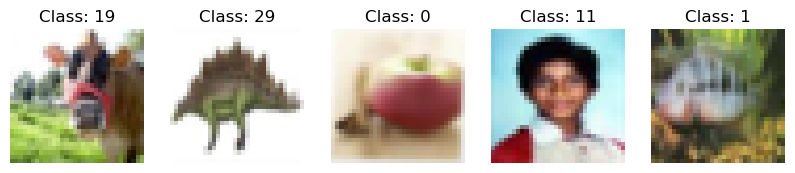

In [5]:
# Display 5 random examples from the training set

plt.figure(figsize=(10, 5))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f'Class: {y_train[i][0]}')
    plt.axis('off')

plt.show()


**Summary of Exploration:**

**Training Set:** It contains 50,000 images with a shape of (50000, 32, 32, 3) (50,000 images, each 32x32 pixels with 3 color channels).

**Test Set:** It contains 10,000 images with a shape of (10000, 32, 32, 3) (10,000 images, each 32x32 pixels with 3 color channels).

**Image Dimensions:** Each image is 32x32 pixels, and the images are in RGB format (3 color channels).

**Number of Classes:** There are 100 classes in the dataset, and each class contains 600 images.

**Class Labels:** The labels are integers ranging from 0 to 99, corresponding to 100 classes.

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [6]:
# Select the first image from the training set
image = x_train[0]

# Display the pixel values of this image
print("Pixel values of the selected image:")
print(image)


Pixel values of the selected image:
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [195 205 193]
  [212 224 204]
  [182 194 167]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [170 176 150]
  [161 168 130]
  [146 154 113]]

 [[255 255 255]
  [254 254 254]
  [255 255 255]
  ...
  [189 199 169]
  [166 178 130]
  [121 133  87]]

 ...

 [[148 185  79]
  [142 182  57]
  [140 179  60]
  ...
  [ 30  17   1]
  [ 65  62  15]
  [ 76  77  20]]

 [[122 157  66]
  [120 155  58]
  [126 160  71]
  ...
  [ 22  16   3]
  [ 97 112  56]
  [141 161  87]]

 [[ 87 122  41]
  [ 88 122  39]
  [101 134  56]
  ...
  [ 34  36  10]
  [105 133  59]
  [138 173  79]]]


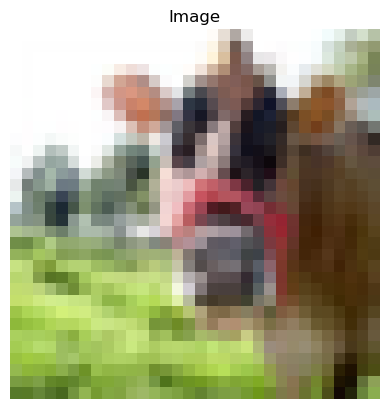

In [7]:
import matplotlib.pyplot as plt

# Visualize the first image
plt.imshow(image)
plt.title("Image")
plt.axis('off')  # Hide axis labels
plt.show()


In [8]:
# # Normalize the image pixel values to the range [0, 1]

x_train, x_test = x_train / 255.0, x_test / 255.0

In [16]:
# After normalizing the image pixel values
image = x_train[0]

# Display the pixel values of this image
print("Pixel values of the selected image:")
print(image)

Pixel values of the selected image:
[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.76470588 0.80392157 0.75686275]
  [0.83137255 0.87843137 0.8       ]
  [0.71372549 0.76078431 0.65490196]]

 [[1.         1.         1.        ]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.66666667 0.69019608 0.58823529]
  [0.63137255 0.65882353 0.50980392]
  [0.57254902 0.60392157 0.44313725]]

 [[1.         1.         1.        ]
  [0.99607843 0.99607843 0.99607843]
  [1.         1.         1.        ]
  ...
  [0.74117647 0.78039216 0.6627451 ]
  [0.65098039 0.69803922 0.50980392]
  [0.4745098  0.52156863 0.34117647]]

 ...

 [[0.58039216 0.7254902  0.30980392]
  [0.55686275 0.71372549 0.22352941]
  [0.54901961 0.70196078 0.23529412]
  ...
  [0.11764706 0.06666667 0.00392157]
  [0.25490196 0.24313725 0.05882353]
  [0.29803922 0.30196078 0.07843137]]

 [[0.47843137 0.61568627 0.25882353]
 

In [17]:
# Convert labels to one-hot encoding

y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100)

In [19]:
from sklearn.model_selection import train_test_split

# Split the training data into 80% training and 20% validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Check the new shapes of the datasets
print(f'Training set shape: {x_train.shape}, Training Labels shape: {y_train.shape}')
print(f'Validation set shape: {x_val.shape}, Validation Labels shape: {y_val.shape}')
print(f'Test set shape: {x_test.shape}, Test Labels shape: {y_test.shape}')

Training set shape: (32000, 32, 32, 3), Training Labels shape: (32000, 100)
Validation set shape: (8000, 32, 32, 3), Validation Labels shape: (8000, 100)
Test set shape: (10000, 32, 32, 3), Test Labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create baseline CNN model
model = models.Sequential()

# 1st Convolutional Layer + Max Pooling + Dropout
model.add(layers.Conv2D(16, (5, 5), activation='relu', input_shape=(32, 32, 3), strides=1, padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))  # Dropout with 30% rate

# 2nd Convolutional Layer + Max Pooling + Dropout
model.add(layers.Conv2D(32, (3, 3), activation='relu', strides=1, padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))  # Dropout with 30% rate

# 3rd Convolutional Layer + Max Pooling + Dropout
model.add(layers.Conv2D(64, (3, 3), activation='relu', strides=1, padding='valid'))  # Valid padding for more reduction
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))  # Dropout with 30% rate

# 4th Convolutional Layer + Dropout
model.add(layers.Conv2D(128, (5, 5), activation='relu', strides=2, padding='valid'))  # Larger filter and stride 2
model.add(layers.Dropout(0.4))  # Dropout with 40% rate

# Flatten the output to feed it into Dense layers
model.add(layers.Flatten())

# Fully connected Dense layer + Dropout
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout with 50% rate

# Output Layer with 100 classes (for CIFAR-100)
model.add(layers.Dense(100, activation='softmax'))

# Print the model summary
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 0, 0, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 0, 0, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 0)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281,092 (1.07 MB)

 Trainable params: 281,092 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

**Loss Function: Categorical Cross-Entropy**
The CIFAR-100 dataset has 100 different categories (like dogs, cars, etc.), and we want the model to correctly identify which category an image belongs to. Categorical cross-entropy helps the model figure out how far off its predictions are from the actual answers, so it can improve over time.


**Optimizer: Adam**
It's like a smart guide for the model during training. It adjusts how fast the model learns from its mistakes, helping it learn more quickly and accurately. It’s a popular choice because it helps the model get better at identifying things in images without taking too long to train.

In [22]:
from keras import optimizers

# Compile the model

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [11]:
# Your code here

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [12]:
# Your code here

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

In [13]:
# Your code here

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [14]:
# Your code here

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [15]:
# Your code here

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.